<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/cuadernos/Modos_Normales_Membrana_rectangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membrana vibrante con fronteras fijas




Prof. Mario I. Caicedo

En 2+1 la ec de ondas es
$$
\frac{\partial^2\phi}{\partial{}x^2}+\frac{\partial^2\phi}{\partial{}x^2}-\frac{1}{v^2}\frac{\partial^2\phi}{\partial{}t^2}=0
$$
Al proponer una solución de ondas planas monocromáticas,
$$
\phi(x,y,t)\propto{}e^{i(k_xx+k_yy-\omega{}t)}$$
se deduce que la relación de dispersión resultante es
$$k_x^2+k_y^2=\frac{\omega^2}{v^2}\,.$$

Ahira bien, si se estudian las oscilaciones de una membrana rectangular cuyas aristas están fijas en las líneas $x=0$, $x=L_x$, $y=0$ y $y=L_y$, las condiciones de borde traen como sonscuencia que los números de onda sean discretos (al igual que las frecuencias de los modos normales) y la relación de dispersión se modifica adoptando la forma
$$
\omega^2_{n_x,n_y}=v^2\left[\frac{n_x^2}{L_x^2}+\frac{n_y^2}{L_y^2}\right]\pi^2\,\quad{}n_x,n_y=1,2,....
$$
de hecho, los modos normales son, evidentemente,
$$
\Phi_{n_x,n_y}(x,y,t)=\phi_{n_x,n_y}(x,y)\,cos(\omega_{n_x,n_y}t)$$

Donde, 

$$\phi_{n_x,n_y}(x,y)=sen(k_{n_x}x)sen(k_{n_y}y)\,,
$$
En forma explícita,
$$
\Phi_{n_x,n_y}(x,y,t)=sen(\frac{n_x\pi{}x}{L_x})sen(\frac{n_y\pi{}y}{L_y})\,cos(\omega_{n_x,n_y}t)\,,
$$


La solución general al problema de Cauchy es una expansión en modos de la forma

$$u(x,y,t)=\sum_{n_x,n_y=1}^{\infty}\left[a_ncos\left(\omega_{n_x,n_y}t\right)+b_nsen\left(\omega_{n_x,n_y}t\right)\right]\phi_{n_x,n_y}(x,y)$$


Bibliotecas

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import animation


Definiendo el modo

In [ ]:
def coeff(n,h,d,L):
  
  A=2*h/(np.pi**2*n**2)

  B=L**2/(d*(L-d))

  C=np.sin(d*n*np.pi/L)

  return A*B*C

In [ ]:
def omega(n,vel,L):

  Om=2.*np.pi*vel*n/L

  return Om

Parámetros 

In [ ]:
h=1
d=4
L=16
vel=.5
Num_ters=20

In [ ]:
def u(x,t,h,d,L,Num_ters):
    u=np.zeros(1000)
    for p in range(1,Num_ters):
      u = u+coeff(p,h,d,L)*np.sin(p*np.pi*x/(L+d))*np.cos(omega(p,vel,L)*t)
    return u

Preparando datos para una serie de fo. doble....

In [ ]:
# Setting up variables for 2D-Fourier Series
Pi = np.pi
c = 1
lx = 1
ly = 1

samples_x, samples_y = (50, 50)  

x = np.linspace(0, lx, samples_x)
y = np.linspace(0, ly, samples_y)

grid_x, grid_y = np.meshgrid(x,y)

Coeficientes y funciones de base construídos como lambda functions.

In [ ]:
# Coefficient function
A_nm = lambda n, m : 1/(m*n*Pi**2) # change this for different fourier series

# kernels
sin_kernel = lambda n, s, L : np.sin(2*Pi*n*s/L)
cos_kernel = lambda n, s, L : np.cos(2*Pi*n*s/L)

No entendo muy bien esta vaina ....

In [ ]:
def z(x_grid, y_grid, t, max_n, max_m):
  z = np.zeros((samples_x, samples_y)) # pre-arrange memory

  # welcome to loop hell  EVIDENTEMENTE ESTO SUMA LA SERIE
  for _n in range(max_n):
    for _m in range(max_m):
      n, m = _n+1, _m+1  # indexing starts at 0, actual values start at 1
      z = 0.2*sin_kernel(n,grid_x,lx)*sin_kernel(m,grid_y,ly)*cos_kernel(c*np.sqrt(n**2 + m**2),t,1)
  return z


Preparando la animacion

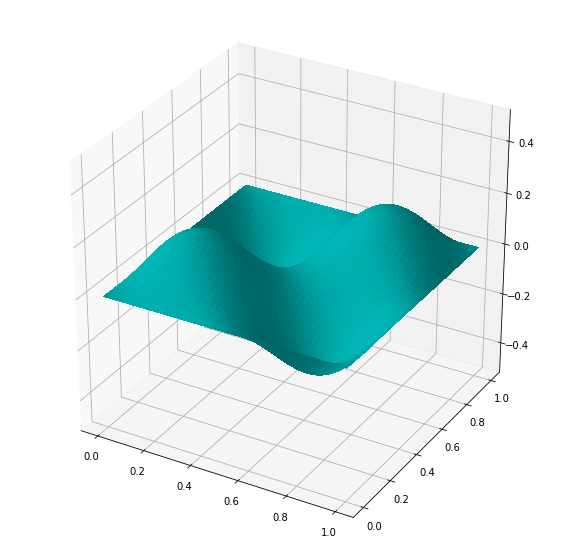

In [ ]:
# setting up figure
fig_3d = plt.figure(figsize=(10,10))
ax_3d = plt.subplot(projection="3d")
ax_3d.set_zlim(-0.5, 0.5)

# arranging z-values for each animation frame
max_time  = 2*Pi        # max simulation time
frames    = 200        # number of frames to get to max_time
z_values  = np.linspace(0, max_time, frames)
z_value_data = np.zeros((frames, samples_x, samples_y)) # reserving memory for frame z-data
for i in range(frames):
  z_value_data[i] = z(grid_x, grid_y, z_values[i], 1, 1) # computing z-data per frame

# setting up initial plot
plot = [ax_3d.plot_surface(grid_x, grid_y, z_value_data[0], antialiased=False, color="c", linewidth=0)]

# setting up animation draw callback
def update_3d_plot(frame, values, plot):
  plot[0].remove()
  plot[0] = ax_3d.plot_surface(grid_x, grid_y, values[frame], antialiased=False, color="c", linewidth=0)
  return plot[0],

ANIMACION

In [ ]:
from IPython.display import HTML

anim_3d = animation.FuncAnimation(fig_3d, update_3d_plot, fargs=(z_value_data, plot), frames=frames, interval=50, blit=False)
HTML(anim_3d.to_html5_video())

In [ ]:
FFwriter = animation.FFMpegWriter(fps=20)
anim_3d.save('animation_2_3.mp4', writer = FFwriter)